## Model 2 - RNN Based With Embedding Layer

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### 1 - Read the data 

In [4]:
df = pd.read_csv("../../data/IMDB Dataset.csv")

def preprocess(x):
    x = re.sub("<br\\s*/?>", " ", x)
    return x    

df.review = df.review.apply(preprocess)
df.sentiment = df.sentiment == "positive"

In [5]:
x_train = df.review.values
y_train = df.sentiment.astype(int).values

### 2- Build the model

In [6]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, Masking, GRU
from tensorflow.keras.models import Model

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam

In [7]:
# Preprocee x_train
MAX_SEQ_LEN = 200
MAX_WORDS_VOCAB = 10000

In [8]:
tokenizer = Tokenizer(num_words=MAX_WORDS_VOCAB, oov_token=0)
tokenizer.fit_on_texts(x_train)

x_train_tokenized = tokenizer.texts_to_sequences(x_train)
x_train = pad_sequences(x_train_tokenized, maxlen=MAX_SEQ_LEN)

In [9]:
def make_model(embedding_dim = 300, n_hidden_lstm = 128, n_hidden_dense = 128):
    x = inp = Input(shape = [MAX_SEQ_LEN])
    x = Embedding(input_dim=MAX_WORDS_VOCAB, output_dim=embedding_dim)(x)
    x = LSTM(units=n_hidden_lstm)(x)
    x = Dense(units=n_hidden_dense, activation='relu')(x)
    x = Dropout(rate=0.3)(x)
    out = x = Dense(1, activation='sigmoid')(x)
    model = Model(inp, out)
    return model

In [10]:
model = make_model()
model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 200, 300)          3000000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               219648    
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 3,236,289
Trainable params: 3,236,289
Non-trainable params: 0
___________________________________________________

### 3- Train

In [11]:
# set up the epoches to have better accuracy
def train(x_train, y_train, model, batch_size=1000):
    scores = []
    loss = []
    num_batch = int(x_train.shape[0] / batch_size)
    for i in range(num_batch-1):
        start = i * batch_size
        end = (i + 1) * batch_size
        history = model.fit(x_train[start:end], y_train[start:end], validation_data=(x_train, y_train), epochs=1)
        scores.append(history.history['val_accuracy'])
        loss.append(history.history['val_loss'])
    return scores

In [12]:
scores = train(x_train, y_train, model)

Train on 1000 samples, validate on 50000 samples
1000/1000 [==============================] - 789s 789ms/sample - loss: 0.6910 - accuracy: 0.5340 - val_loss: 0.6787 - val_accuracy: 0.6464
Train on 1000 samples, validate on 50000 samples
1000/1000 [==============================] - 12407s 12s/sample - loss: 0.6045 - accuracy: 0.7110 - val_loss: 0.5765 - val_accuracy: 0.7102
Train on 1000 samples, validate on 50000 samples
1000/1000 [==============================] - 757s 757ms/sample - loss: 0.5460 - accuracy: 0.7210 - val_loss: 0.5100 - val_accuracy: 0.7529
Train on 1000 samples, validate on 50000 samples
1000/1000 [==============================] - 746s 746ms/sample - loss: 0.4407 - accuracy: 0.7990 - val_loss: 0.3886 - val_accuracy: 0.8297
Train on 1000 samples, validate on 50000 samples
1000/1000 [==============================] - 745s 745ms/sample - loss: 0.4222 - accuracy: 0.8100 - val_loss: 0.3556 - val_accuracy: 0.8481
Train on 1000 samples, validate on 50000 samples
1000/1000 [

1000/1000 [==============================] - 533s 533ms/sample - loss: 0.3468 - accuracy: 0.8650 - val_loss: 0.2715 - val_accuracy: 0.9035
Train on 1000 samples, validate on 50000 samples
1000/1000 [==============================] - 533s 533ms/sample - loss: 0.3437 - accuracy: 0.8570 - val_loss: 0.2532 - val_accuracy: 0.9095
Train on 1000 samples, validate on 50000 samples
1000/1000 [==============================] - 395s 395ms/sample - loss: 0.3114 - accuracy: 0.8680 - val_loss: 0.2302 - val_accuracy: 0.9118
Train on 1000 samples, validate on 50000 samples
1000/1000 [==============================] - 395s 395ms/sample - loss: 0.2937 - accuracy: 0.8820 - val_loss: 0.2252 - val_accuracy: 0.9136
Train on 1000 samples, validate on 50000 samples
1000/1000 [==============================] - 395s 395ms/sample - loss: 0.3066 - accuracy: 0.8750 - val_loss: 0.2270 - val_accuracy: 0.9164
Train on 1000 samples, validate on 50000 samples
1000/1000 [==============================] - 395s 395ms/samp

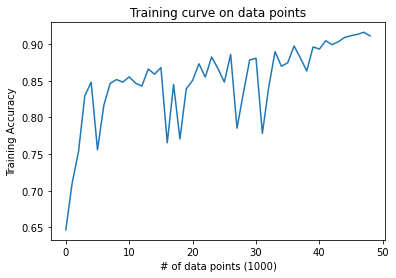

In [15]:
plt.plot(scores, label='Train Accuracy')
plt.xlabel('# of data points (1000)')
plt.ylabel('Training Accuracy')
plt.title('Training curve on data points')
plt.show()